In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_excel('/content/drive/MyDrive/ExcelR/Assignments/Online retail.xlsx',header=None)

In [31]:
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [19]:
df[0][0]

'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'

In [21]:
transactions = df[0].apply(lambda x: [item.strip() for item in x.split(',')]).tolist()

In [29]:
len(transactions)

7501

In [23]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [25]:
df_transaction = pd.DataFrame(te_ary, columns=te.columns_)

In [32]:
df_transaction.shape

(7501, 119)

In [33]:
transactions[:2]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs']]

In [34]:
df_transaction.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [51]:
freq_patterns = apriori(df_transaction,min_support=0.01,use_colnames=True)


In [101]:
rules = association_rules(freq_patterns,metric='confidence',min_threshold=0.05)

In [102]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,1.0,0.004398,1.063198,0.417434,0.073129,0.059442,0.136473
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,1.0,0.004398,1.058080,0.420238,0.073129,0.054892,0.136473
3,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,1.0,0.002779,1.039630,0.178411,0.072934,0.038120,0.149934
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,1.0,0.002779,1.018933,0.194767,0.072934,0.018581,0.149934
5,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,1.0,0.013128,1.086988,0.555754,0.120941,0.080026,0.245256
6,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
7,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,1.0,0.007096,1.108844,0.353384,0.093168,0.098160,0.190499
8,(french fries),(burgers),0.170911,0.087188,0.021997,0.128705,1.476173,1.0,0.007096,1.047650,0.389069,0.093168,0.045482,0.190499
9,(frozen vegetables),(burgers),0.095321,0.087188,0.010532,0.110490,1.267250,1.0,0.002221,1.026195,0.233110,0.061240,0.025527,0.115642


In [103]:
print(rules['confidence'].max())
print(rules['lift'].max())
print(rules['confidence'].min())
print(rules['lift'].min())

0.5066666666666667
3.2919938411349285
0.050335570469798654
0.7290193444252525


In [108]:
strong_rules = rules[(rules['confidence'] > 0.4) & (rules['lift'] > 1)]


In [110]:
strong_rules.sort_values(by='lift', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
400,"(mineral water, ground beef)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,1.0,0.009938,1.416470,0.607262,0.086195,0.294020,0.257474
363,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,1.0,0.005365,1.543848,0.540342,0.040816,0.352268,0.274586
396,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,1.0,0.005822,1.532552,0.537969,0.044385,0.347493,0.274725
340,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,1.0,0.005434,1.447937,0.508837,0.043640,0.309362,0.259925
384,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,1.0,0.005440,1.434136,0.503555,0.044102,0.302716,0.257674
294,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
419,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,1.0,0.005459,1.397557,0.488452,0.045479,0.284466,0.251562
413,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,1.0,0.004799,1.378954,0.478514,0.040892,0.274813,0.245370
407,"(milk, spaghetti)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,1.0,0.007278,1.368879,0.479672,0.060950,0.269475,0.254802
345,"(milk, chocolate)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,1.0,0.006340,1.349656,0.467922,0.054574,0.259071,0.247205


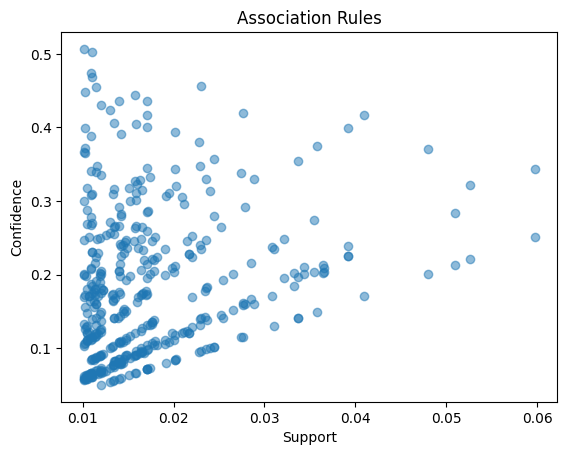

In [112]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()


### **Analysis & Interpretation**
**Max lift = 3.29** :- some product pairs are bought together 3x more often than chance.

**Max confidence = 0.50** :- not super strong, but indicates moderate reliability.

The rules reveal that mineral water frequently co-occurs with a wide variety of grocery staples like ground beef, milk, eggs, spaghetti, and chocolate.

Confidence values (~40–50%) indicate a moderate likelihood, while lifts (>1.7) confirm that these associations are meaningful and not random.

For example, customers buying (ground beef + eggs) are 2.12 times more likely to also purchase mineral water compared to chance.

These insights can help in cross-selling strategies. For instance:

Promote mineral water near meat/dairy sections.

Bundle spaghetti with ground beef and water.

Offer combo deals (e.g., “Buy pasta ingredients, get 10% off water”).

### **Interview Question**

**1. What is lift and why is it important in Association rules?**

Lift measures how much more often two items occur together than expected if they were independent.

If Lift > 1, A and B are positively related. If = 1, they’re independent. If < 1, they’re negatively related.

It tells you whether the rule is actually interesting or just by chance. Confidence alone can be misleading, lift adds context.

**2. What is support and Confidence. How do you calculate them?**

**Support(A->B):** Proportion of transactions that contain both A and B.

**Confidence(A->B):** Probability of buying B given that A is bought.



**3. What are some limitations or challenges of Association rules mining?**

* Generates too many rules if dataset is big (hard to interpret).

* Rules may not be meaningful if thresholds aren’t set carefully.

* Doesn’t capture sequence (A before B), just co-occurrence.

* Sensitive to support/confidence thresholds.

* Imbalanced data can skew results (popular items always appear).